# Basic AI chatbot using langGraph (GRAPH API)

In [1]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    # Messages have the type "list" and the "add_messages" is function
    # in Annotated define how this message should be updated
    # in this case it append the message to the list, instead of updating the message
    messages: Annotated[list, add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

# llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")
llm = init_chat_model("groq:meta-llama/llama-4-scout-17b-16e-instruct") # This is an alternative way to initialize the
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x11ab1d010>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x11af82d20>, model_name='meta-llama/llama-4-scout-17b-16e-instruct', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
# Node functionality
def chatBot(state: State) -> dict:
    # Append the AI response to the messages list
    return {"messages": state["messages"] + [llm.invoke(state["messages"])]}

In [6]:
graph_builder = StateGraph(State)

# Create the chatbot node
graph_builder.add_node("llm-chatbot", chatBot)

## Adding Edges
graph_builder.add_edge(START, "llm-chatbot")
graph_builder.add_edge("llm-chatbot", END)

# Compile Graph
graph = graph_builder.compile()

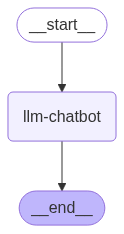

In [7]:
# Visualize the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    # Handle the case where the graph cannot be displayed
    print(f"Error displaying graph: {e}")

In [8]:
response = graph.invoke({"messages": "HI"})

In [10]:
response['messages'][-1].content

"Hi! How's your day going so far? Is there something I can help you with or would you like to chat?"

In [11]:
for event in graph.stream({"messages": "Hello! How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

Hello! I'm just a language model, I don't have feelings like humans do, but I'm functioning properly and ready to help you with any questions or tasks you have. How can I assist you today?
